In [6]:

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

## 데이터 읽어오기.
df = pd.read_csv("../dataset/BostonHousing.csv")





1 Physical GPUs, 1 Logical GPUs


In [7]:


## key말고 해당하는 value값만 추출해서 입력과 정갑 데이터 분류
dataset = df.copy()

X = dataset
Y = dataset.pop('MEDV')


In [8]:

# 모델의 설정
input_Layer = tf.keras.layers.Input((13, ))
x = tf.keras.layers.Dense(10, activation="sigmoid")(input_Layer)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.Dense(30, activation="sigmoid")(x)
Out_Layer = tf.keras.layers.Dense(1, activation=None)(x)

model = tf.keras.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_6 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 31        
Total params: 1,021
Trainable params: 1,021
Non-trainable params: 0
_________________________________________________________________


In [9]:

## 모델 loss, 학습 방법 선언
loss=tf.keras.losses.mean_squared_error
optimizer=tf.keras.optimizers.SGD(learning_rate=0.05)

## 모델 컴파일
model.compile(loss=loss,
              optimizer=optimizer,
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

## 모델 동작
result=model.fit(X, Y, epochs=2000, batch_size=100) # 모델 fit 해서 동작하기

## model fit은 histoy를 반환한다. 훈련중의 발생하는 모든 정보를 담고 있는 딕셔너리.
## histoy는 딕셔너리이므로 keys()를 통해 출력의 key(카테고리)를 알 수 있다.
print(result.history.keys())


Epoch 1/2000
6/6 [==============================] - 0s 2ms/step - loss: 197.4565 - root_mean_squared_error: 14.0519
Epoch 2/2000
6/6 [==============================] - 0s 2ms/step - loss: 122.2724 - root_mean_squared_error: 11.0577
Epoch 3/2000
6/6 [==============================] - 0s 2ms/step - loss: 85.9714 - root_mean_squared_error: 9.2721
Epoch 4/2000
6/6 [==============================] - 0s 2ms/step - loss: 85.6140 - root_mean_squared_error: 9.2528
Epoch 5/2000
6/6 [==============================] - 0s 2ms/step - loss: 85.3735 - root_mean_squared_error: 9.2398
Epoch 6/2000
6/6 [==============================] - 0s 3ms/step - loss: 87.0182 - root_mean_squared_error: 9.3284
Epoch 7/2000
6/6 [==============================] - 0s 2ms/step - loss: 88.5513 - root_mean_squared_error: 9.4102
Epoch 8/2000
6/6 [==============================] - 0s 3ms/step - loss: 85.8735 - root_mean_squared_error: 9.2668
Epoch 9/2000
6/6 [==============================] - 0s 2ms/step - loss: 90.4119 - ro

In [10]:
TEST_DATA = [[0.06, 0., 7.09, 0., 0.5, 6.5, 77.0, 5., 2., 220., 18.0, 396.99, 5.3]]
print(model.weights)
print(result.history.keys())
print("predict = ", model.predict(TEST_DATA))

[<tf.Variable 'dense_4/kernel:0' shape=(13, 10) dtype=float32, numpy=
array([[ 1.98205993e-01, -1.81461483e-01,  2.25216851e-01,
         2.61948146e-02, -3.45549911e-01, -6.47616610e-02,
         4.48391080e-01,  8.25627595e-02, -3.33471820e-02,
         2.73009360e-01],
       [-3.02606016e-01, -3.12630832e-01, -4.08538878e-01,
         4.12216872e-01, -2.26793736e-01, -3.62805188e-01,
        -3.38258862e-01,  2.83682346e-03,  1.09016947e-01,
         3.31558138e-01],
       [ 3.84014249e-01,  3.33237171e-01, -2.50259228e-02,
         3.45406346e-02,  1.17334485e-01,  4.77287561e-01,
         2.12503433e-01,  6.35683462e-02,  3.53635907e-01,
        -3.81693989e-01],
       [ 1.94680110e-01, -4.12053317e-01,  4.56234217e-01,
         3.97584647e-01,  8.19708109e-02, -3.52802306e-01,
        -2.65061975e-01, -4.50849771e-01,  5.09985387e-01,
         3.78190398e-01],
       [-3.45637232e-01, -3.21469009e-02,  5.59257250e-03,
         3.46891247e-05,  1.82959914e-01, -1.47511423e-01,


16/16 [==============================] - 0s 3ms/step - loss: 76.9294 - root_mean_squared_error: 8.7709

 Test rmse: 8.7709


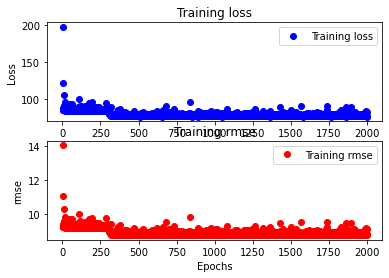

In [11]:

### history에서 loss key를 가지는 값들만 추출
loss = result.history['loss']

### loss그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 root_mean_squared_error key를 가지는 값들만 추출
rmse = result.history['root_mean_squared_error']
epochs = range(1, len(rmse) + 1)
### mean_absolute_error를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, rmse, 'ro', label='Training rmse')
plt.title('Training rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

print("\n Test rmse: %.4f" % (model.evaluate(X, Y)[1]))
plt.show()
